In [1]:
from ucimlrepo import fetch_ucirepo

wine_data = fetch_ucirepo(id=109)

# Pandas DataFrame
X = wine_data.data.features
y = wine_data.data.targets
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = wine_data.data.features[['Alcohol', 'Malicacid']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Create SVM classifier
svm_classifier = SVC(kernel="linear")

# Train the classifier on the scaled training data
svm_classifier.fit(X_train_scaled, np.ravel(y_train))
y_pred_scaled = svm_classifier.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy: {accuracy_scaled*100:.2f}%")

Accuracy: 86.11%


#### Result visualization

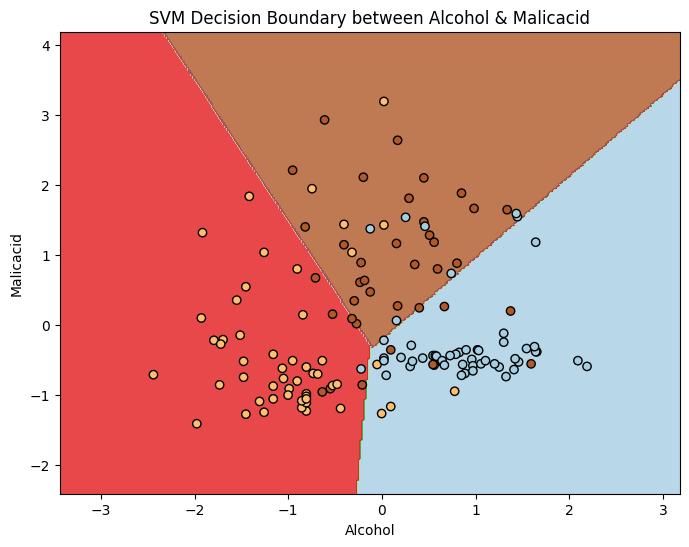

In [7]:
import matplotlib.pyplot as plt

# Create a meshgrid of points to make predictions
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions on the meshgrid
Z = svm_classifier.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, 
             cmap=plt.cm.Paired, 
             alpha=0.8)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
            c=y_train.to_numpy(), 
            cmap=plt.cm.Paired, 
            edgecolor='k')
plt.xlabel(X.Alcohol.name)
plt.ylabel(X.Malicacid.name)
plt.title(f'SVM Decision Boundary between {X.Alcohol.name} & {X.Malicacid.name}')
plt.show()

#### Fit SVM model using all features and types as the target value.

In [9]:
from sklearn.model_selection import train_test_split

# All features
X = wine_data.data.features
# Wine types
y = wine_data.data.targets

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)

param_grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf']
}

svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, np.ravel(y_train))

best_params = grid_search.best_params_
print(best_params)

{'C': 0.1, 'kernel': 'linear'}


In [13]:
from sklearn.metrics import classification_report
import os

best_classifier = SVC(**best_params)
best_classifier.fit(X_train_scaled, np.ravel(y_train))

y_pred = best_classifier.predict(X_valid_scaled)
print(f"Accuracy: {accuracy_score(y_valid, y_pred)*100:.2f}%")
print("Classification Report", os.linesep, classification_report(y_test, y_pred))

Accuracy: 97.22%
Classification Report 
               precision    recall  f1-score   support

           1       0.36      0.57      0.44         7
           2       0.62      0.44      0.52        18
           3       0.25      0.27      0.26        11

    accuracy                           0.42        36
   macro avg       0.41      0.43      0.41        36
weighted avg       0.45      0.42      0.42        36
